In [2]:
import os
import json
import string
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
from synthesized.testing import synthetic_distributions as syn_dist
from synthesized.testing.evaluate_sparsity_regimes import missing_patterns, synthesize_and_plot_results

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-3139-2D31-322D-B531
Expires at: 2019-12-31 00:00:00


In [4]:
def plot_dist(data: pd.DataFrame, data_missing: pd.DataFrame):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
    ax1.set_title('orig')
    ax2.set_title('missing')
    sns.scatterplot(x='x', y='y', data=data, ax=ax1, color=sns.color_palette()[0])
    sns.scatterplot(x='x', y='y', data=data_missing, ax=ax2, color=sns.color_palette()[1])
    plt.show()
    
def plot_heatmap(data1: pd.DataFrame, data2: pd.DataFrame):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
    ax1.set_title('orig')
    ax2.set_title('synth')
    
    crosstab1 = pd.crosstab(data1['x'], columns=[data1['y']]).apply(lambda r: r/r.sum(), axis=1)
    sns.heatmap(crosstab1, vmin=0.0, vmax=1.0, ax=ax1)
    
    crosstab2 = pd.crosstab(data2['x'], columns=[data2['y']]).apply(lambda r: r/r.sum(), axis=1)
    sns.heatmap(crosstab2, vmin=0.0, vmax=1.0, ax=ax2)
            

============= MCAR =============
Prop. NaNs:
x    0.4942
y    0.4992
dtype: float64


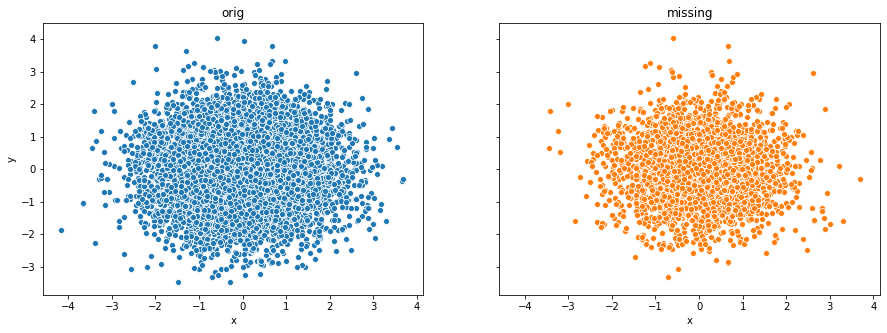

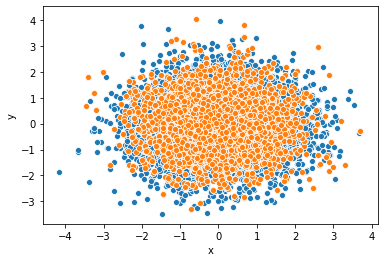

============= MAR =============
Prop. NaNs:
x    0.5001
y    0.4998
dtype: float64


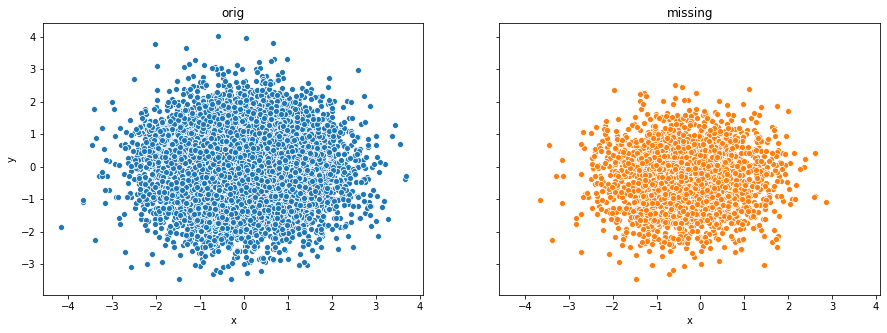

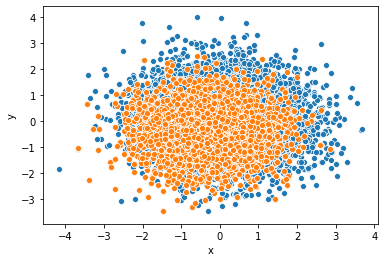

============= MNAR =============
Prop. NaNs:
x    0.5000
y    0.5001
dtype: float64


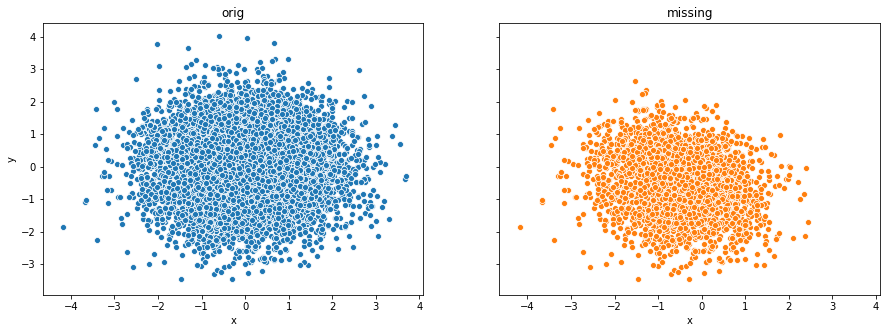

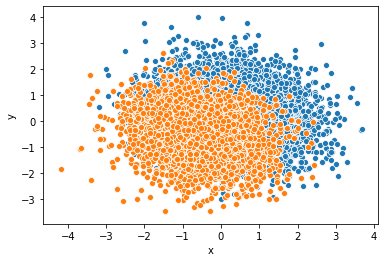

In [5]:
data = syn_dist.create_gauss_ball(x_mean=0, x_std=1, y_mean=0, y_std=1, size=10000)

keep_ratio = 0.5
std_noise = 2.

# MCAR
print('============= MCAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MCAR')

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )
plot_dist(data, data_missing)

sns.scatterplot(x='x', y='y', data=data, color=sns.color_palette()[0])
sns.scatterplot(x='x', y='y', data=data_missing, color=sns.color_palette()[1])
plt.show()


# MAR
print('============= MAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MAR', std_noise=std_noise)

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )
plot_dist(data, data_missing)

sns.scatterplot(x='x', y='y', data=data, color=sns.color_palette()[0])
sns.scatterplot(x='x', y='y', data=data_missing, color=sns.color_palette()[1])
plt.show()


# MNAR
print('============= MNAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MNAR', std_noise=std_noise)

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )
plot_dist(data, data_missing)

sns.scatterplot(x='x', y='y', data=data, color=sns.color_palette()[0])
sns.scatterplot(x='x', y='y', data=data_missing, color=sns.color_palette()[1])
plt.show()

In [6]:
from synthesized.testing import UtilityTesting
from synthesized import HighDimSynthesizer

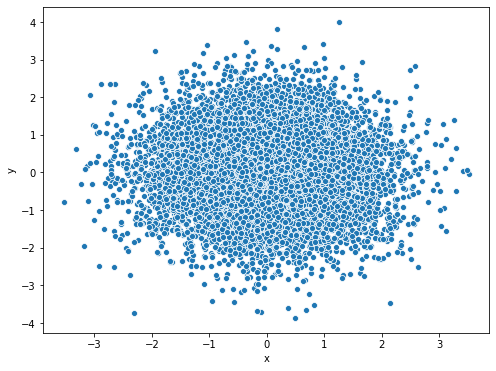

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Computed results for 75% NaNs for MCAR. Took 64.23s.
Computed results for 70% NaNs for MCAR. Took 62.45s.
Computed results for 65% NaNs for MCAR. Took 71.95s.
Computed results for 60% NaNs for MCAR. Took 65.64s.
Computed results for 55% NaNs for MCAR. Took 62.51s.
Computed results for 50% NaNs for MCAR. Took 62.08s.
Computed results for 45% NaNs for MCAR. Took 61.87s.
Computed results for 40% NaNs for MCAR. Took 61.15s.
Computed results for 35% NaNs for MCAR. Took 60.77s.
Computed results for 30% NaNs for MCAR. Took 60.97s.
Computed results for 25% NaNs for MCAR. Took 60.55s.
Computed results for 20% NaNs for MCAR. Took 60.40s.
Computed results for 15% NaNs for MCAR. Took 60.50s.
Computed results for 10% NaNs for MCAR. Took 60.40s.
Computed results for 5% NaNs for MCAR. Took 60.27s.
Computed results for 0% NaNs for MCAR. Took 52.27s.


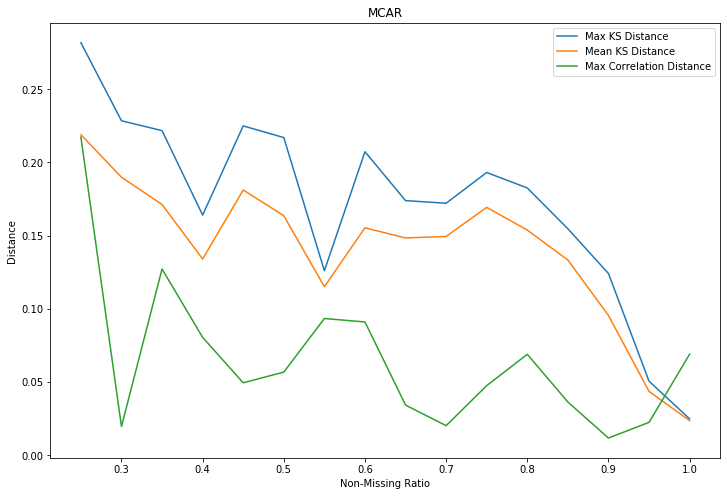

Computed results for 75% NaNs for MAR. Took 60.21s.
Computed results for 70% NaNs for MAR. Took 60.40s.
Computed results for 65% NaNs for MAR. Took 63.24s.
Computed results for 60% NaNs for MAR. Took 66.03s.
Computed results for 55% NaNs for MAR. Took 69.22s.
Computed results for 50% NaNs for MAR. Took 92.46s.
Computed results for 45% NaNs for MAR. Took 126.11s.
Computed results for 40% NaNs for MAR. Took 98.72s.
Computed results for 35% NaNs for MAR. Took 73.43s.
Computed results for 30% NaNs for MAR. Took 64.59s.
Computed results for 25% NaNs for MAR. Took 61.22s.
Computed results for 20% NaNs for MAR. Took 72.03s.
Computed results for 15% NaNs for MAR. Took 81.95s.
Computed results for 10% NaNs for MAR. Took 79.07s.
Computed results for 5% NaNs for MAR. Took 94.51s.
Computed results for 0% NaNs for MAR. Took 66.45s.


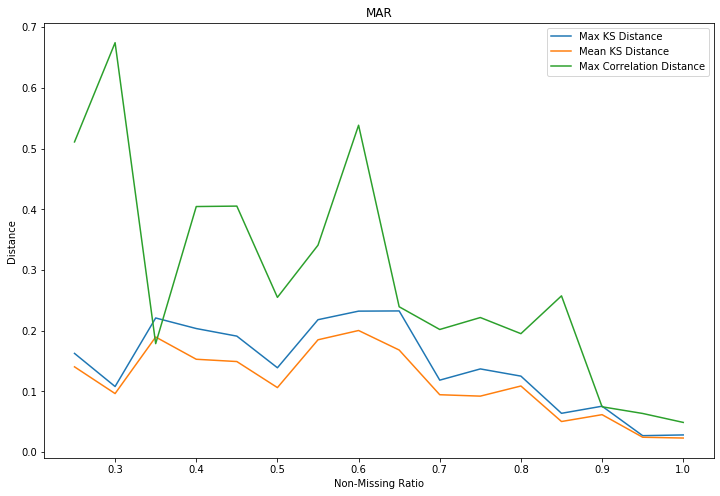

Computed results for 75% NaNs for MNAR. Took 99.59s.
Computed results for 70% NaNs for MNAR. Took 71.18s.
Computed results for 65% NaNs for MNAR. Took 76.04s.
Computed results for 60% NaNs for MNAR. Took 73.12s.
Computed results for 55% NaNs for MNAR. Took 73.02s.
Computed results for 50% NaNs for MNAR. Took 79.55s.
Computed results for 45% NaNs for MNAR. Took 73.52s.
Computed results for 40% NaNs for MNAR. Took 79.24s.
Computed results for 35% NaNs for MNAR. Took 67.06s.
Computed results for 30% NaNs for MNAR. Took 72.35s.
Computed results for 25% NaNs for MNAR. Took 77.51s.
Computed results for 20% NaNs for MNAR. Took 77.42s.
Computed results for 15% NaNs for MNAR. Took 63.01s.
Computed results for 10% NaNs for MNAR. Took 61.66s.
Computed results for 5% NaNs for MNAR. Took 61.17s.
Computed results for 0% NaNs for MNAR. Took 52.98s.


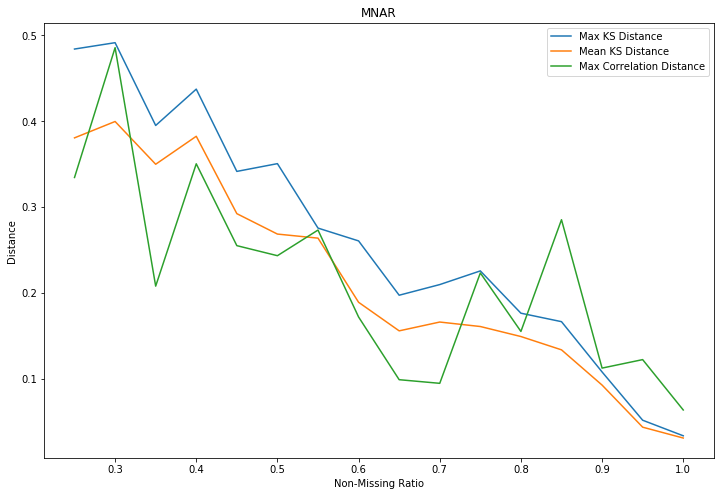

In [7]:
data = syn_dist.create_gauss_ball(x_mean=0, x_std=1, y_mean=0, y_std=1, size=10000)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=data)
plt.show()

results = dict()
for mechanism in ['MCAR', 'MAR', 'MNAR']:
    results[mechanism] = synthesize_and_plot_results(
        data, mechanism, n_iter=2500, std_noise = 2., start=25, end=100, step=5, n_experiments=3
    )


In [ ]:
import pandas as pd
import numpy as np
def create_gauss_ball(x_mean: float,
                      x_std: float,
                      y_mean: float,
                      y_std: float,
                      size: int,
                      cor: float = 0.) -> pd.DataFrame:
    """Creates a two-dimensional (axes: x,y) gauss distribution with params N([x_mean, y_mean], [x_std, y_std])"""
    mean = [x_mean, y_mean]
    cov = [[x_std ** 2, x_std * y_std * cor], [x_std * y_std * cor, y_std ** 2]]
    x, y = np.random.multivariate_normal(mean, cov, size).T
    df = pd.DataFrame({'x': x, 'y': y})
    return df

In [ ]:
data = syn_dist.create_gauss_ball(x_mean=0, x_std=1, y_mean=0, y_std=1, size=10000)
